In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'chest-x-ray-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4610581%2F7859946%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240415%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240415T081917Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db499ff9e6ed6306e6b57f64e108e69f692cfd0fd70f29512150a5f0467bc0dede3cc2cccbaebc094b4ce8bfa7a496ebe49d41d3a5069411db73ff8b0697bc5d9626229e6f46e13a31b7a888a5bdda7d74561596f72672e47e3bc0a2e812f03ef5fce8b2959e5d5cdf05e39fbc5039d6154d4ce97ae532014ff7b1c6bc35c4955afddc52cec1b9a2f509f915af079e2e60fb3d74ae69353288822a14a368a6468d63416ce00c713a53a6f3e1a1decdea9542db096bebbddcc347ec50c58b9064d0247e227a44811e28150bf0fe0a53001fceb4c1b2f226d90d00efba601cb0603cee3219f6eb599c301eda69910c65f968f6ab650282de425707a709a3ac734c4,resnet18-model:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4628445%2F7884876%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240415%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240415T081917Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da1bb5b3578a56739647f513f67f0a46860fb53a4a616da3ffbd0261e2f03ff8f1eb65cd5e56c630e31aad65b16874f8231b79aee61844a6b1765dd64af89144e2384b06e2d30a403b4ef1ffa294758612a13f7f04726c949926425f9c773c6c2d0ead412c452a3d2200d266c85f97b83a4e06c0db66f2db0ca3733015892176651558318cf1e8ac41a43c624b66b35af520e0fd9812ca9077600973f6714d41e49e04e245a8fbfdc06d95bc0d46cc6d44af83b6c244bc9e5f32257116e7181bbed2f527c5de9f93602c1811ce27e20afe86e2bfcdb87aa1f433aea09f5a6323e8958065f5ce34b07dfb29cf6a78f4b8f524a1a854d2e1a9c35b3fcb0f31b00e3'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 765806673 bytes downloaded
Downloaded and uncompressed: chest-x-ray-images
[==================================================] 43451679 bytes downloaded
Downloaded and uncompressed: resnet18-model
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-x-ray-images/CXR Images/covid190026.png
/kaggle/input/chest-x-ray-images/CXR Images/EUNTcLTXYAEzvUG.jfif
/kaggle/input/chest-x-ray-images/CXR Images/covid1900388.png
/kaggle/input/chest-x-ray-images/CXR Images/EUR2DcOXgAEg1Xt.jfif
/kaggle/input/chest-x-ray-images/CXR Images/EUNWpWGWoAMgXxO.jfif
/kaggle/input/chest-x-ray-images/CXR Images/covid1900348.png
/kaggle/input/chest-x-ray-images/CXR Images/covid1900507.png
/kaggle/input/chest-x-ray-images/CXR Images/covid1900598.png
/kaggle/input/chest-x-ray-images/CXR Images/covid190030.png
/kaggle/input/chest-x-ray-images/CXR Images/065.jpeg
/kaggle/input/chest-x-ray-images/CXR Images/COVID-00032.jpg
/kaggle/input/chest-x-ray-images/CXR Images/covid1900167.png
/kaggle/input/chest-x-ray-images/CXR Images/covid-19-pneumonia-67.jpeg
/kaggle/input/chest-x-ray-images/CXR Images/CASE56_XRAY_1.jpeg
/kaggle/input/chest-x-ray-images/CXR Images/case38_Xray_1.jpeg
/kaggle/input/chest-x-ray-images/CXR Images/auntminnie-2020_01_31_20_2

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
covid_directory = f'/kaggle/input/chest-x-ray-images/CXR Images'
normal_directory = f'/kaggle/input/chest-x-ray-images/CXR Images Normal'
pneumonia_directory = f'/kaggle/input/chest-x-ray-images/CXR Images Pneumonia'

image_size = (299, 299)

def load_images(directory):
    class_images = []
    for filename in os.listdir(directory):
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image, image_size)
        resized_image = resized_image.astype(np.float32)
        normalized_image = resized_image / 255.0
        class_images.append(normalized_image)

    return np.array(class_images)

covid_images = load_images(covid_directory)
normal_images = load_images(normal_directory)
pneumonia_images = load_images(pneumonia_directory)

print(covid_images.shape)
print(normal_images.shape)
print(pneumonia_images.shape)

(673, 299, 299, 3)
(758, 299, 299, 3)
(709, 299, 299, 3)


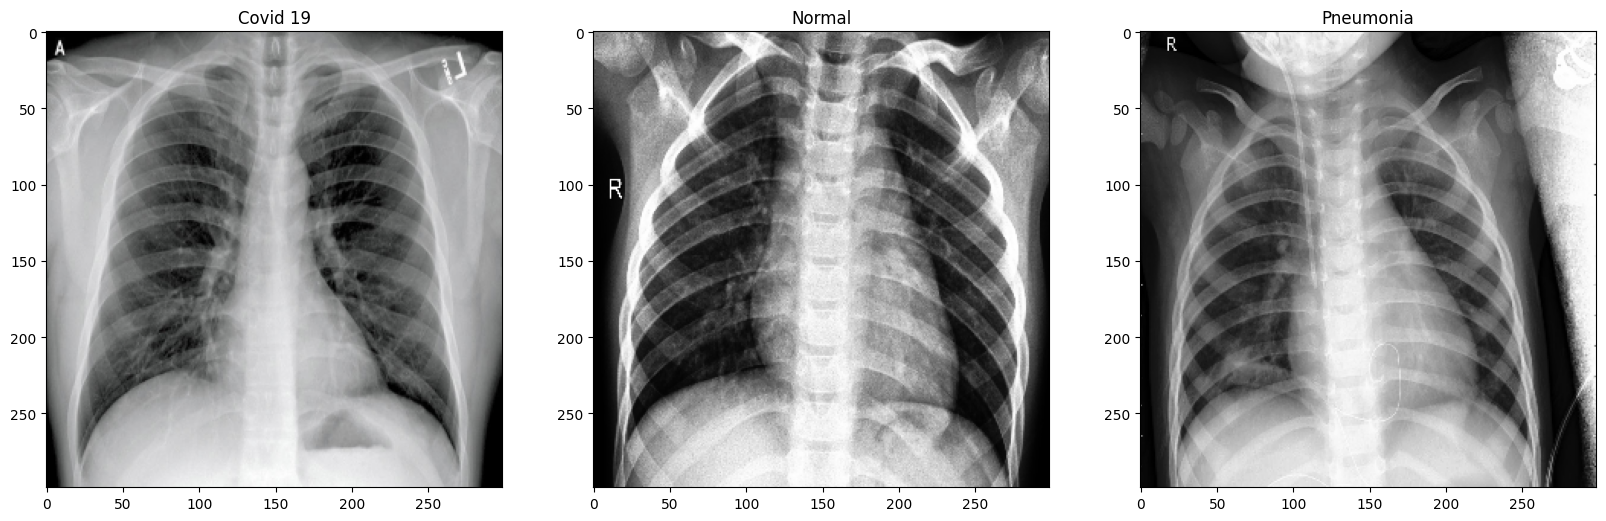

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize = (20,20))
ax[0].imshow(covid_images[0])
ax[0].title.set_text("Covid 19")
ax[1].imshow(normal_images[0])
ax[1].title.set_text("Normal")
ax[2].imshow(pneumonia_images[0])
ax[2].title.set_text("Pneumonia")

In [ ]:
all_images = np.concatenate((covid_images, normal_images, pneumonia_images), axis=0)
print(all_images.shape)
covid_labels = np.zeros(len(covid_images), dtype=np.int32)
pneumonia_labels = np.ones(len(pneumonia_images), dtype=np.int32)
normal_labels = np.full(len(normal_images), 2, dtype=np.int32)

all_labels = np.concatenate((covid_labels, normal_labels, pneumonia_labels), axis=0)
print(all_labels.shape)

(2140, 299, 299, 3)
(2140,)


In [ ]:
train_val_split, test_split = 0.6, 0.4
X_train_val, X_test, y_train_val, y_test = train_test_split(all_images, all_labels, train_size = train_val_split, test_size = test_split, random_state=42, stratify=all_labels)
train_split, val_split = 0.9, 0.1
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=train_split, test_size=val_split, random_state=42, stratify=y_train_val)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import torchvision
import torch

In [ ]:
from torchvision.models import inception_v3
from torch import nn

model = inception_v3(weights='DEFAULT')

input_features = model.fc.in_features
model.fc = nn.Sequential(
        nn.Dropout(p=0.6),
        nn.Linear(input_features, 3),
        nn.Softmax(dim=1)
    )

model.load_state_dict(torch.load('/content/gdrive/MyDrive/Model Checkpoints and metrics/InceptionV3_complete_saved.pt', map_location=torch.device('cpu')))
model.eval()

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 121MB/s] 


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [ ]:
print(y_test[28], y_test[25], y_test[26])

2 0 1


y_test[5]- Normal

y_test[7]- Pneumonia

y_test[10]- COVID

y_test[16]- Normal

y_test[15]-Pneumonia

y_test[18]- COVID

y_test[25]- COVID

y_test[26]- Pneumonia

y_test[28]- Normal

In [ ]:
normal = torch.from_numpy(X_test[28])
print(normal.max(), normal.min())
normal = torch.unsqueeze(normal,dim=0).permute(0,3,1,2)
print(normal.shape)

tensor(1.) tensor(0.)
torch.Size([1, 3, 299, 299])


In [ ]:
outputs = model(normal)
print(outputs)
print(torch.argmax(outputs,dim=1))

tensor([[2.1075e-04, 5.9827e-02, 9.3996e-01]], grad_fn=<SoftmaxBackward0>)
tensor([2])


In [ ]:
pneumonia = torch.from_numpy(X_test[26])
print(pneumonia.max(), pneumonia.min())
pneumonia = torch.unsqueeze(pneumonia,dim=0).permute(0,3,1,2)
print(pneumonia.shape)

tensor(1.) tensor(0.0039)
torch.Size([1, 3, 299, 299])


In [ ]:
outputs = model(pneumonia)
print(outputs)
print(torch.argmax(outputs,dim=1))

tensor([[7.6454e-14, 1.0000e+00, 2.2931e-12]], grad_fn=<SoftmaxBackward0>)
tensor([1])


In [ ]:
covid = torch.from_numpy(X_test[25])
print(covid.max(), covid.min())
covid = torch.unsqueeze(covid,dim=0).permute(0,3,1,2)
print(covid.shape)

tensor(0.9961) tensor(0.0353)
torch.Size([1, 3, 299, 299])


In [ ]:
outputs = model(covid)
print(outputs)
print(torch.argmax(outputs,dim=1))

tensor([[0.9904, 0.0084, 0.0013]], grad_fn=<SoftmaxBackward0>)
tensor([0])


In [ ]:
!pip install captum
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 7.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
print(X_test[26].max(), X_test[26].min())

1.0 0.003921569


In [ ]:
normal_1 = (X_test[5] * 255).astype('uint8')
normal_2 = (X_test[16] * 255).astype('uint8')
normal_3 = (X_test[28] * 255).astype('uint8')
pneumonia_1 = (X_test[7] * 255).astype('uint8')
pneumonia_2 = (X_test[15] * 255).astype('uint8')
pneumonia_3 = (X_test[26] * 255).astype('uint8')
covid_1 = (X_test[10] * 255).astype('uint8')
covid_2 = (X_test[18] * 255).astype('uint8')
covid_3 = (X_test[25] * 255).astype('uint8')

# Assuming you have the images stored in the variables mentioned
images = {
    "normal_1": normal_1,
    "normal_2": normal_2,
    "normal_3": normal_3,
    "pneumonia_1": pneumonia_1,
    "pneumonia_2": pneumonia_2,
    "pneumonia_3": pneumonia_3,
    "covid_1": covid_1,
    "covid_2": covid_2,
    "covid_3": covid_3
}

# Loop through the images and save each one
for name, image_array in images.items():
    # Create PIL Image object
    image = Image.fromarray(image_array)

    # Save the image with descriptive name to your Google Drive
    save_path = f"/content/gdrive/My Drive/Interpretability Base Images/{name}.jpg"  # Adjust the path as needed
    image.save(save_path)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import torch
import torchvision
import numpy as np
from torchvision.models import inception_v3

In [ ]:
from torchvision.models import inception_v3
from torch import nn

model = inception_v3(weights='DEFAULT')

input_features = model.fc.in_features
model.fc = nn.Sequential(
        nn.Dropout(p=0.6),
        nn.Linear(input_features, 3),
        nn.Softmax(dim=1)
    )

model.load_state_dict(torch.load('/content/gdrive/MyDrive/Model Checkpoints and metrics/InceptionV3_complete_saved.pt', map_location=torch.device('cpu')))
model.eval()

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 66.9MB/s] 


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stri

In [ ]:
!pip install captum
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

# **Saliency and GradCAM of first batch of images**

In [ ]:
import os
import cv2

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images'
normal_1 = cv2.imread(source_path+'/normal_1.jpg')
normal_1 = torch.from_numpy(normal_1)
normal_1 = normal_1.type(torch.FloatTensor) / 255.0
normal_1 = torch.unsqueeze(normal_1, dim=0).permute(0,3,1,2)

In [ ]:
print(normal_1, normal_1.dtype)

tensor([[[[0.1529, 0.1608, 0.1765,  ..., 0.0000, 0.0000, 0.0000],
          [0.1451, 0.1569, 0.1686,  ..., 0.0000, 0.0000, 0.0000],
          [0.1373, 0.1451, 0.1608,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.1529, 0.1608, 0.1765,  ..., 0.0000, 0.0000, 0.0000],
          [0.1451, 0.1569, 0.1686,  ..., 0.0000, 0.0000, 0.0000],
          [0.1373, 0.1451, 0.1608,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.1529, 0.1608, 0.1765,  ..., 0.0000, 0.0000, 0.0000],
          [0.1451, 0.1569, 0.1686,  ..., 0.0000, 0.0000, 0.0000],
          [0.1373, 0.1451, 0.1608,  ..., 0

In [ ]:
import captum
from captum.attr import Saliency

In [ ]:
saliency = Saliency(model)
attributions = saliency.attribute(normal_1, target=2)

/usr/local/lib/python3.10/dist-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


In [ ]:
print(attributions)

tensor([[[[5.6107e-04, 7.1088e-04, 1.6397e-03,  ..., 2.2944e-04,
           1.5476e-04, 8.3279e-05],
          [2.2626e-04, 1.9596e-03, 1.5993e-03,  ..., 1.9301e-04,
           7.5739e-05, 4.7575e-05],
          [1.0992e-03, 4.5036e-04, 3.3397e-03,  ..., 4.7978e-04,
           6.2138e-05, 1.0768e-04],
          ...,
          [2.5557e-05, 1.8587e-04, 4.3894e-04,  ..., 9.4452e-06,
           1.1007e-05, 1.0088e-05],
          [5.2095e-05, 5.2360e-05, 1.1743e-04,  ..., 1.7223e-05,
           2.6445e-06, 1.3354e-06],
          [8.5249e-05, 8.4992e-05, 3.8211e-05,  ..., 1.4928e-05,
           9.7651e-07, 4.0641e-07]],

         [[1.1062e-03, 2.5890e-03, 3.0608e-03,  ..., 1.8259e-05,
           8.8180e-05, 4.9414e-05],
          [3.0347e-03, 3.5843e-03, 4.9010e-03,  ..., 7.9957e-05,
           1.0764e-04, 7.6933e-05],
          [1.7177e-03, 3.5246e-03, 2.1483e-03,  ..., 5.0946e-05,
           7.6284e-05, 1.0288e-04],
          ...,
          [5.3615e-05, 2.4578e-04, 4.6298e-05,  ..., 9.0119

In [ ]:
import captum
normal_1 = torch.squeeze(normal_1, dim=0)
normal_1 = normal_1.permute(1,2,0)
attribution = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(normal_1.shape, attributions.shape)

torch.Size([299, 299, 3]) torch.Size([1, 3, 299, 299])


In [ ]:
attributions = attribution.numpy()
normal_1 = normal_1.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(299, 299, 3)


In [ ]:
import matplotlib.pyplot as plt

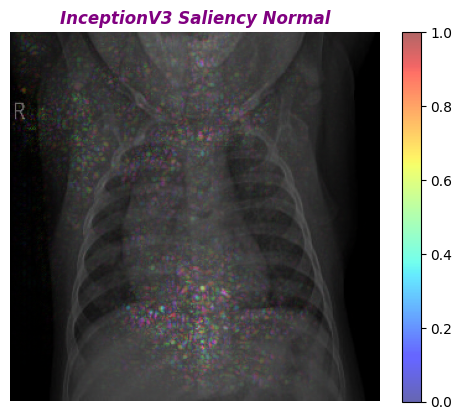

In [ ]:
plt.imshow(normal_1)
plt.imshow(attributions, cmap='jet', alpha=0.6)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("InceptionV3 Saliency Normal", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images'
covid_1 = cv2.imread(source_path+'/covid_1.jpg')
covid_1 = torch.from_numpy(covid_1)
covid_1 = covid_1.type(torch.FloatTensor) / 255.0
covid_1 = torch.unsqueeze(covid_1, dim=0).permute(0,3,1,2)

In [ ]:
print(covid_1.dtype, covid_1.shape)

torch.float32 torch.Size([1, 3, 299, 299])


In [ ]:
saliency = Saliency(model)
attributions = saliency.attribute(covid_1, target=0)

/usr/local/lib/python3.10/dist-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


In [ ]:
print(attributions)

tensor([[[[3.8821e-09, 5.1104e-09, 3.8512e-08,  ..., 2.4988e-08,
           3.0872e-08, 2.6602e-08],
          [9.6920e-10, 6.5024e-09, 5.5980e-08,  ..., 6.8582e-09,
           9.0454e-09, 6.7402e-08],
          [4.4799e-09, 9.0885e-09, 6.3469e-08,  ..., 5.9232e-09,
           8.5658e-08, 2.5417e-08],
          ...,
          [1.0879e-08, 2.1250e-08, 2.2961e-08,  ..., 4.2659e-08,
           3.1407e-08, 2.7895e-08],
          [2.7293e-09, 1.0202e-08, 7.5305e-09,  ..., 1.4776e-08,
           1.6457e-08, 1.3000e-08],
          [3.2440e-09, 3.4545e-09, 8.1817e-09,  ..., 6.1149e-09,
           8.8505e-09, 1.0286e-08]],

         [[4.1656e-09, 5.7854e-09, 2.3942e-10,  ..., 2.1878e-08,
           7.5724e-08, 6.4264e-08],
          [8.1233e-09, 1.7184e-08, 1.7909e-08,  ..., 7.2649e-08,
           1.0655e-07, 5.1486e-08],
          [7.5254e-09, 3.9690e-09, 3.8902e-10,  ..., 4.7186e-09,
           1.9881e-07, 1.6215e-07],
          ...,
          [1.1262e-08, 1.9034e-08, 5.9033e-08,  ..., 9.4125

In [ ]:
import captum
covid_1 = torch.squeeze(covid_1, dim=0)
covid_1 = covid_1.permute(1,2,0)
attributions = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(normal_1.shape, attributions.shape)

(299, 299, 3) torch.Size([299, 299, 3])


In [ ]:
attributions = attributions.numpy()
covid_1 = covid_1.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(299, 299, 3)


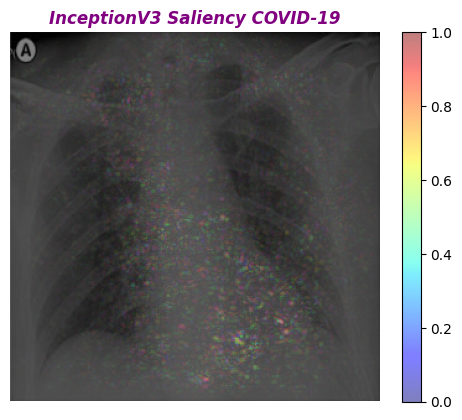

In [ ]:
plt.imshow(covid_1)
plt.imshow(attributions, cmap='jet', alpha=0.5)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("InceptionV3 Saliency COVID-19", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images'
pneumonia_1 = cv2.imread(source_path+'/pneumonia_1.jpg')
pneumonia_1 = torch.from_numpy(pneumonia_1)
pneumonia_1 = pneumonia_1.type(torch.FloatTensor) / 255.0
pneumonia_1 = torch.unsqueeze(pneumonia_1, dim=0).permute(0,3,1,2)

In [ ]:
print(pneumonia_1.dtype, pneumonia_1.shape)

torch.float32 torch.Size([1, 3, 299, 299])


In [ ]:
saliency = Saliency(model)
attributions = saliency.attribute(pneumonia_1, target=1)

/usr/local/lib/python3.10/dist-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


In [ ]:
print(attributions)

tensor([[[[1.0188e-10, 2.6413e-10, 8.1185e-10,  ..., 1.1201e-08,
           6.1836e-09, 5.0311e-11],
          [5.6678e-10, 1.9588e-09, 2.9068e-09,  ..., 8.9675e-09,
           1.7308e-09, 1.2637e-09],
          [2.1004e-09, 3.4062e-09, 4.4090e-09,  ..., 5.1420e-09,
           6.2644e-09, 2.4841e-09],
          ...,
          [8.4025e-11, 2.7880e-10, 1.2717e-10,  ..., 2.0808e-10,
           1.2916e-10, 2.6305e-10],
          [2.5099e-10, 4.3052e-10, 2.4535e-10,  ..., 3.4252e-10,
           6.1853e-11, 8.7867e-12],
          [1.8898e-11, 2.1035e-10, 1.2146e-11,  ..., 9.4642e-11,
           4.4579e-11, 3.3041e-12]],

         [[1.2957e-09, 1.8401e-09, 1.5995e-10,  ..., 4.2019e-10,
           7.3277e-09, 3.6760e-09],
          [1.9100e-09, 1.6255e-09, 3.9802e-09,  ..., 2.0929e-09,
           7.6772e-09, 6.0525e-09],
          [9.0868e-10, 2.2221e-09, 3.6402e-09,  ..., 6.4183e-09,
           4.4727e-09, 9.0613e-09],
          ...,
          [1.3260e-10, 1.3776e-10, 2.2356e-10,  ..., 4.6197

In [ ]:
import captum
pneumonia_1 = torch.squeeze(pneumonia_1, dim=0)
pneumonia_1 = pneumonia_1.permute(1,2,0)
attributions = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(pneumonia_1.shape, attributions.shape)

torch.Size([299, 299, 3]) torch.Size([299, 299, 3])


In [ ]:
attributions = attributions.numpy()
pneumonia_1 = pneumonia_1.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(299, 299, 3)


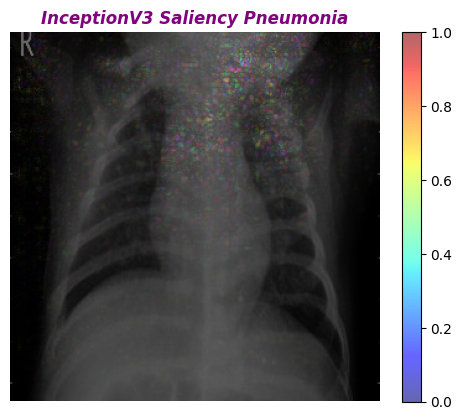

In [ ]:
plt.imshow(pneumonia_1)
plt.imshow(attributions, cmap='jet', alpha=0.6)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("InceptionV3 Saliency Pneumonia", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 19.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  U

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import cv2

In [ ]:
import torch
import torchvision

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images InceptionV3'
normal_2 = cv2.imread(source_path+'/normal_2.jpg')
normal_2 = torch.from_numpy(normal_2)
normal_2 = normal_2.type(torch.FloatTensor) / 255.0
normal_2 = torch.unsqueeze(normal_2, dim=0).permute(0,3,1,2)

In [ ]:
print(normal_2)

tensor([[[[0.3412, 0.3098, 0.3961,  ..., 0.0000, 0.0000, 0.0000],
          [0.3059, 0.3451, 0.4196,  ..., 0.0000, 0.0000, 0.0000],
          [0.2667, 0.3608, 0.4078,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.3412, 0.3098, 0.3961,  ..., 0.0000, 0.0000, 0.0000],
          [0.3059, 0.3451, 0.4196,  ..., 0.0000, 0.0000, 0.0000],
          [0.2667, 0.3608, 0.4078,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.3412, 0.3098, 0.3961,  ..., 0.0000, 0.0000, 0.0000],
          [0.3059, 0.3451, 0.4196,  ..., 0.0000, 0.0000, 0.0000],
          [0.2667, 0.3608, 0.4078,  ..., 0

In [ ]:
from pytorch_grad_cam import GradCAM

target_layer = [model.Mixed_7c.branch_pool]

cam = GradCAM(model=model, target_layers=target_layer)

cam_map = cam(input_tensor=normal_2, eigen_smooth=True, aug_smooth=True)

print(cam_map)

[[[0.03169748 0.03169748 0.03169748 ... 0.         0.         0.        ]
  [0.03169748 0.03169748 0.03169748 ... 0.         0.         0.        ]
  [0.03169748 0.03169748 0.03169748 ... 0.         0.         0.        ]
  ...
  [0.04002269 0.04002269 0.04002269 ... 0.         0.         0.        ]
  [0.04002269 0.04002269 0.04002269 ... 0.         0.         0.        ]
  [0.04002269 0.04002269 0.04002269 ... 0.         0.         0.        ]]]


In [ ]:
import numpy as np

In [ ]:
print(type(cam_map))
print(cam_map.shape)
cam_map = np.reshape(cam_map, (299,299,1))
print(cam_map.shape)

<class 'numpy.ndarray'>
(1, 299, 299)
(299, 299, 1)


In [ ]:
image_numpy = torch.squeeze(normal_2, dim=0).permute(1,2,0).numpy()
print(type(image_numpy), image_numpy.shape)

<class 'numpy.ndarray'> (299, 299, 3)


In [ ]:
import matplotlib.pyplot as plt

cam_map_normalized = (cam_map - np.min(cam_map)) / (np.max(cam_map) - np.min(cam_map))

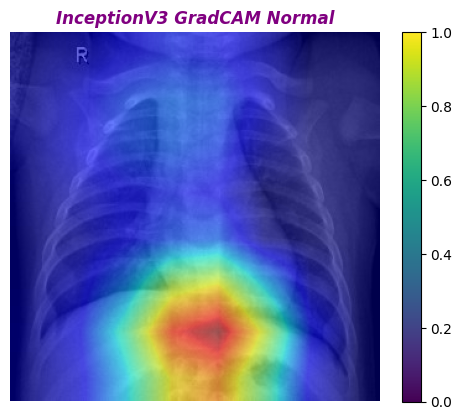

In [ ]:
fig, ax = plt.subplots()

heatmap = ax.imshow(image_numpy)

ax.imshow(cam_map_normalized, cmap='jet', alpha=0.6, interpolation='bilinear')
plt.colorbar(heatmap, fraction=0.06, pad=0.046)
plt.title("InceptionV3 GradCAM Normal", color='purple', weight='bold', style='oblique')
ax.axis('off')

plt.show()


In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images InceptionV3'
covid_2 = cv2.imread(source_path+'/covid_2.jpg')
covid_2 = torch.from_numpy(covid_2)
covid_2 = covid_2.type(torch.FloatTensor) / 255.0
covid_2 = torch.unsqueeze(covid_2, dim=0).permute(0,3,1,2)

In [ ]:
from pytorch_grad_cam import GradCAM

target_layer = [model.Mixed_7c.branch_pool]

cam = GradCAM(model=model, target_layers=target_layer)

cam_map = cam(input_tensor=covid_2, eigen_smooth=True, aug_smooth=True)

print(cam_map)

[[[0.2569224  0.2569224  0.2569224  ... 0.19320683 0.19320683 0.19320683]
  [0.2569224  0.2569224  0.2569224  ... 0.19320683 0.19320683 0.19320683]
  [0.2569224  0.2569224  0.2569224  ... 0.19320683 0.19320683 0.19320683]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]]


In [ ]:
print(type(cam_map))
print(cam_map.shape)
cam_map = np.reshape(cam_map, (299,299,1))
print(cam_map.shape)

<class 'numpy.ndarray'>
(1, 299, 299)
(299, 299, 1)


In [ ]:
image_numpy = torch.squeeze(covid_2, dim=0).permute(1,2,0).numpy()
print(type(image_numpy), image_numpy.shape)

<class 'numpy.ndarray'> (299, 299, 3)


In [ ]:
import matplotlib.pyplot as plt

cam_map_normalized = (cam_map - np.min(cam_map)) / (np.max(cam_map) - np.min(cam_map))

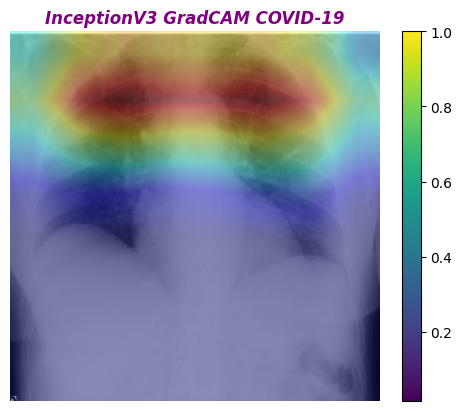

In [ ]:
fig, ax = plt.subplots()

heatmap = ax.imshow(image_numpy)

ax.imshow(cam_map_normalized, cmap='jet', alpha=0.35, interpolation='bilinear')
plt.colorbar(heatmap, fraction=0.06, pad=0.046)
plt.title("InceptionV3 GradCAM COVID-19", color='purple', weight='bold', style='oblique')
ax.axis('off')

plt.show()


In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images InceptionV3'
pneumonia_2 = cv2.imread(source_path+'/pneumonia_2.jpg')
pneumonia_2 = torch.from_numpy(pneumonia_2)
pneumonia_2 = pneumonia_2.type(torch.FloatTensor) / 255.0
pneumonia_2 = torch.unsqueeze(pneumonia_2, dim=0).permute(0,3,1,2)

In [ ]:
from pytorch_grad_cam import GradCAM

target_layer = [model.Mixed_7c.branch_pool]

cam = GradCAM(model=model, target_layers=target_layer)

cam_map = cam(input_tensor=pneumonia_2, eigen_smooth=True, aug_smooth=True)

print(cam_map)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:
print(type(cam_map))
print(cam_map.shape)
cam_map = np.reshape(cam_map, (299,299,1))
print(cam_map.shape)

<class 'numpy.ndarray'>
(1, 299, 299)
(299, 299, 1)


In [ ]:
image_numpy = torch.squeeze(pneumonia_2, dim=0).permute(1,2,0).numpy()
print(type(image_numpy), image_numpy.shape)

<class 'numpy.ndarray'> (299, 299, 3)


In [ ]:
import matplotlib.pyplot as plt

cam_map_normalized = (cam_map - np.min(cam_map)) / (np.max(cam_map) - np.min(cam_map))

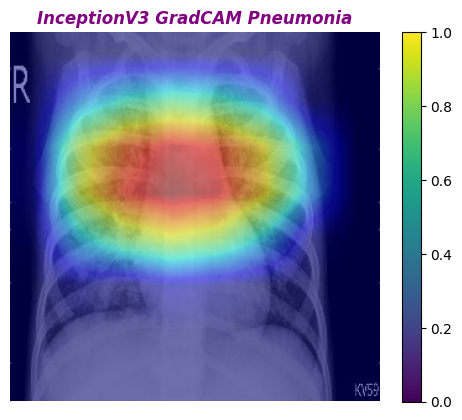

In [ ]:
fig, ax = plt.subplots()

heatmap = ax.imshow(image_numpy)

ax.imshow(cam_map_normalized, cmap='jet', alpha=0.5, interpolation='bilinear')
plt.colorbar(heatmap, fraction=0.06, pad=0.046)
plt.title("InceptionV3 GradCAM Pneumonia", color='purple', weight='bold', style='oblique')
ax.axis('off')

plt.show()


# **Saliency and GradCAM of second batch of images**

In [ ]:
import cv2

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images InceptionV3'
normal_2 = cv2.imread(source_path+'/normal_2.jpg')
normal_2 = torch.from_numpy(normal_2)
normal_2 = normal_2.type(torch.FloatTensor) / 255.0
normal_2 = torch.unsqueeze(normal_2, dim=0).permute(0,3,1,2)

In [ ]:
print(normal_2)

tensor([[[[0.3412, 0.3098, 0.3961,  ..., 0.0000, 0.0000, 0.0000],
          [0.3059, 0.3451, 0.4196,  ..., 0.0000, 0.0000, 0.0000],
          [0.2667, 0.3608, 0.4078,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.3412, 0.3098, 0.3961,  ..., 0.0000, 0.0000, 0.0000],
          [0.3059, 0.3451, 0.4196,  ..., 0.0000, 0.0000, 0.0000],
          [0.2667, 0.3608, 0.4078,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.3412, 0.3098, 0.3961,  ..., 0.0000, 0.0000, 0.0000],
          [0.3059, 0.3451, 0.4196,  ..., 0.0000, 0.0000, 0.0000],
          [0.2667, 0.3608, 0.4078,  ..., 0

In [ ]:
import captum
from captum.attr import Saliency

In [ ]:
saliency = Saliency(model)
attributions = saliency.attribute(normal_2, target=2)

/usr/local/lib/python3.10/dist-packages/captum/_utils/gradient.py:57: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


In [ ]:
print(attributions)

tensor([[[[4.6304e-07, 1.0272e-06, 3.0065e-06,  ..., 8.2941e-06,
           2.1671e-06, 5.8515e-07],
          [8.0614e-07, 1.7259e-06, 5.2828e-06,  ..., 8.7684e-06,
           6.5331e-06, 3.3518e-06],
          [2.9072e-06, 6.9571e-06, 9.6182e-06,  ..., 1.4105e-05,
           7.1038e-06, 6.3103e-06],
          ...,
          [3.5472e-06, 9.9956e-06, 4.4881e-05,  ..., 1.4351e-06,
           3.2217e-07, 2.2667e-07],
          [3.5232e-06, 7.5360e-06, 3.1788e-05,  ..., 3.7972e-07,
           1.8647e-07, 2.7264e-07],
          [2.4383e-06, 4.7424e-06, 1.6745e-05,  ..., 1.8916e-07,
           1.8350e-07, 3.2081e-07]],

         [[2.6509e-07, 6.0746e-07, 2.9562e-06,  ..., 5.4907e-07,
           9.8990e-07, 2.4299e-07],
          [6.9918e-07, 1.3232e-06, 3.7562e-06,  ..., 2.4055e-06,
           4.1874e-06, 1.5828e-06],
          [8.6345e-07, 7.9862e-07, 1.1090e-05,  ..., 8.6990e-06,
           2.2613e-07, 5.4537e-06],
          ...,
          [2.9520e-06, 1.5623e-05, 2.3480e-05,  ..., 1.6888

In [ ]:
import captum
normal_2 = torch.squeeze(normal_2, dim=0)
normal_2 = normal_2.permute(1,2,0)
attribution = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(normal_2.shape, attributions.shape)

torch.Size([299, 299, 3]) torch.Size([1, 3, 299, 299])


In [ ]:
attributions = attribution.numpy()
normal_2 = normal_2.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(299, 299, 3)


In [ ]:
import matplotlib.pyplot as plt

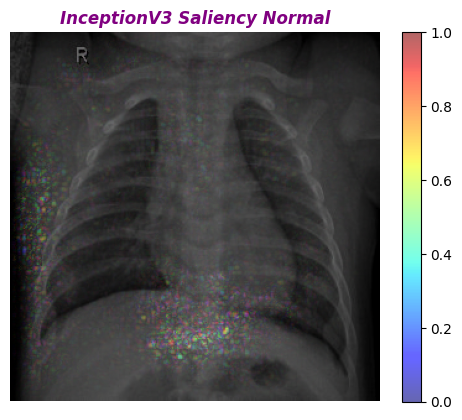

In [ ]:
plt.imshow(normal_2)
plt.imshow(attributions, cmap='jet', alpha=0.6)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("InceptionV3 Saliency Normal", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images InceptionV3'
covid_2 = cv2.imread(source_path+'/covid_2.jpg')
covid_2 = torch.from_numpy(covid_2)
covid_2 = covid_2.type(torch.FloatTensor) / 255.0
covid_2 = torch.unsqueeze(covid_2, dim=0).permute(0,3,1,2)

In [ ]:
saliency = Saliency(model)
attributions = saliency.attribute(covid_2, target=0)

In [ ]:
print(attributions)

tensor([[[[4.9730e-08, 2.8874e-08, 6.1975e-08,  ..., 1.9406e-08,
           2.7372e-08, 1.0237e-09],
          [7.1539e-09, 7.4112e-08, 1.1577e-07,  ..., 5.7505e-08,
           4.4614e-08, 2.0725e-08],
          [3.9546e-08, 2.2777e-07, 1.3450e-07,  ..., 2.3962e-08,
           1.3753e-07, 9.3664e-08],
          ...,
          [2.8155e-08, 4.9700e-08, 3.5232e-08,  ..., 1.0994e-07,
           1.4011e-07, 1.1862e-07],
          [2.7332e-08, 4.6548e-08, 2.2200e-08,  ..., 1.0024e-07,
           1.2721e-07, 8.8113e-08],
          [1.7020e-08, 2.4939e-08, 1.3099e-08,  ..., 8.2966e-08,
           8.6067e-08, 7.8687e-08]],

         [[4.0716e-08, 9.6421e-08, 2.0762e-07,  ..., 2.2976e-08,
           2.6084e-08, 1.3857e-08],
          [5.9119e-08, 1.6036e-07, 3.7073e-07,  ..., 1.8371e-08,
           4.7577e-08, 5.5854e-09],
          [3.0182e-07, 4.3439e-07, 6.0214e-07,  ..., 6.6768e-09,
           1.0010e-08, 4.1394e-08],
          ...,
          [2.1620e-08, 1.3946e-08, 2.2620e-08,  ..., 2.4312

In [ ]:
import captum
covid_2 = torch.squeeze(covid_2, dim=0)
covid_2 = covid_2.permute(1,2,0)
attribution = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(covid_2.shape, attributions.shape)

torch.Size([299, 299, 3]) torch.Size([1, 3, 299, 299])


In [ ]:
attributions = attribution.numpy()
covid_2 = covid_2.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

(299, 299, 3)


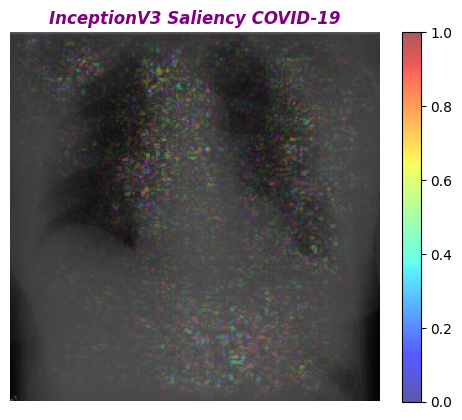

In [ ]:
plt.imshow(covid_2)
plt.imshow(attributions, cmap='jet', alpha=0.65)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("InceptionV3 Saliency COVID-19", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()

In [ ]:
source_path = '/content/gdrive/MyDrive/Interpretability Base Images InceptionV3'
pneumonia_2 = cv2.imread(source_path+'/pneumonia_2.jpg')
pneumonia_2 = torch.from_numpy(pneumonia_2)
pneumonia_2 = pneumonia_2.type(torch.FloatTensor) / 255.0
pneumonia_2 = torch.unsqueeze(pneumonia_2, dim=0).permute(0,3,1,2)

In [ ]:
saliency = Saliency(model)
attributions = saliency.attribute(pneumonia_2, target=1)

In [ ]:
print(attributions)

tensor([[[[5.7471e-17, 2.4845e-16, 1.9328e-16,  ..., 6.5282e-16,
           1.6646e-15, 1.3186e-15],
          [3.3811e-16, 3.8843e-16, 1.4379e-15,  ..., 3.1760e-15,
           3.6820e-15, 1.7706e-15],
          [2.0256e-16, 4.1593e-16, 5.7798e-16,  ..., 2.9669e-15,
           9.4002e-15, 5.3720e-15],
          ...,
          [2.1812e-16, 3.9398e-16, 7.3890e-16,  ..., 1.1968e-16,
           3.5145e-17, 4.6243e-17],
          [6.6535e-18, 7.3841e-17, 4.0997e-16,  ..., 4.0464e-17,
           3.3987e-17, 7.9140e-18],
          [8.3586e-17, 3.5364e-17, 2.7112e-16,  ..., 1.9117e-17,
           1.7966e-17, 7.0381e-18]],

         [[1.5517e-16, 7.6082e-16, 1.2851e-15,  ..., 1.0773e-17,
           1.5634e-15, 1.0995e-15],
          [5.8794e-16, 1.1139e-15, 1.8153e-15,  ..., 1.2260e-15,
           1.6486e-15, 2.0760e-15],
          [1.1669e-16, 1.1962e-15, 2.1841e-15,  ..., 4.3659e-16,
           7.8987e-16, 1.9352e-15],
          ...,
          [1.7544e-16, 4.5399e-17, 1.4820e-16,  ..., 9.4734

In [ ]:
import captum
pneumonia_2 = torch.squeeze(pneumonia_2, dim=0)
pneumonia_2 = pneumonia_2.permute(1,2,0)
attribution = torch.squeeze(attributions, dim=0).permute(1,2,0)
print(pneumonia_2.shape, attributions.shape)

torch.Size([299, 299, 3]) torch.Size([1, 3, 299, 299])


In [ ]:
attributions = attribution.numpy()
pneumonia_2 = pneumonia_2.numpy()


In [ ]:
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())


In [ ]:
print(attributions.shape)

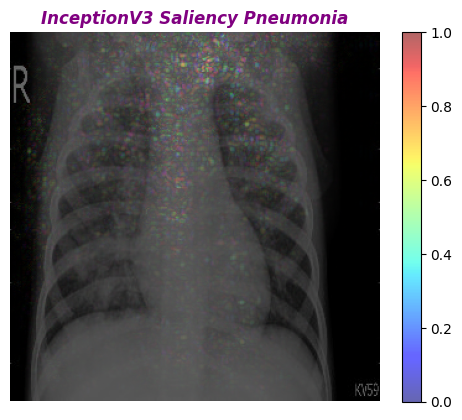

In [ ]:
plt.imshow(pneumonia_2)
plt.imshow(attributions, cmap='jet', alpha=0.6)
plt.colorbar(fraction=0.06, pad=0.046, orientation='vertical')
plt.title("InceptionV3 Saliency Pneumonia", color='purple', weight='bold', style='oblique')
plt.axis('off')
plt.show()